In [53]:
''' Let's Make the functions of simple linear regression with input data having 1 feature
make 4 functions 
fit() -> find the values of m,c for fitting the best line to the data
predict() -> for predicting the x values ie y_pred
score()  R2 score/coefficient of determination ->  1-u/v
cost() cost or error function -> sum.(y_i-(m*x_i+c))^2 where y_i -> true value (m*x_i+c)->y_pred
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
data=np.loadtxt("C:/Users/a/Desktop/Data Science/CN (Practice)/data.csv",delimiter=',')
# print(data)
x=data[:,0].reshape(-1,1)
y=data[:,1].reshape(-1,1)
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y) # here you can pass how much percent of original data you want to pass
                                                                    #   as training data and rest as testing data in terms of fraction that lies b/w 0-1
print(x_train.shape)
print(x_test.shape)

def fit(x_train,y_train):
    m=((x_train*y_train).mean()-(x_train.mean()*y_train.mean()))/((x_train**2).mean()-(x_train.mean())**2)
    c=y_train.mean()-(m*(x_train.mean()))
    return m,c

m,c=fit(x_train,y_train)
print("Slope/Coefficient :",m)
print("Intercept :",c)


def predict(x,m,c):
    y_pred=m*x+c
    return y_pred

y_pred=predict(x_test,m,c)


def score(x,y_t):
    y_pred=m*x+c
    v=((y_t-y_pred)**2).sum()
    u=((y_t-y_t.mean())**2).sum()
    score=1-(v/u)
    return score
    

def cost(x,y,m,c):
    cost=((y-(m*x+c))**2).sum()
    return cost

print("Train Score : ",score(x_train,y_train))
print("Test Score : ",score(x_test,y_test))
print("Error/cost on testing data : ",cost(x_test,y_test,m,c))


print(" \nBy applying pre defined functions \n")
from sklearn.linear_model import LinearRegression
alg=LinearRegression()
alg.fit(x_train,y_train)
y_pred=alg.predict(x_test)
alg_cost=((y_test-y_pred)**2).sum()

print("Slope/Coefficient :",alg.coef_[0][0])
print("Intercept :",alg.intercept_[0])
print("Train Score : ",alg.score(x_train,y_train))
print("Test Score : ",alg.score(x_test,y_test))
print("Error/cost on testing data : ",alg_cost)



(75, 1)
(25, 1)
Slope/Coefficient : 1.3835511879050193
Intercept : 5.586278506164206
Train Score :  0.6131002814954125
Test Score :  0.5310017347217648
Error/cost on testing data :  3107.8144848932884
 
By applying pre defined functions 

Slope/Coefficient : 1.3835511879050162
Intercept : 5.586278506164362
Train Score :  0.6131002814954127
Test Score :  0.5310017347217653
Error/cost on testing data :  3107.8144848932857


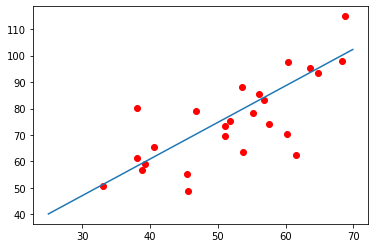

In [60]:
x=np.arange(25,70,0.1)
plt.plot(x,m*x+c)
plt.scatter(x_test,y_test,color="r")